# Regressionsmodell 1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import neighbors, datasets, svm, tree
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
print(df) # Ausgabe 

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558806  2015     Kia                 K900       Luxury      Sedan   
558807  2012     Ram                 2500  Power Wagon   Crew Cab   
558808  2012     BMW                   X5    xDrive35d        SUV   
558809  2015  Nissan               Altima        2.5 S      sedan   
558810  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0   white   
1         automat

In [3]:
        #Die Funktion head() wird verwendet, um die ersten n Zeilen zu erhalten.
        #Diese Funktion gibt die ersten n Zeilen des Objekts auf der Grundlage der Position zurück. Sie ist nützlich, um schnell zu testen, ob das Objekt die richtige Art von Daten enthält.
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
#Das shape-Attribut von pandas.DataFrame speichert die Anzahl der Zeilen und Spalten als Tupel 
df.shape 

(558811, 16)

In [5]:
#Die Methode info() von pandas.DataFrame kann Informationen wie die Anzahl der Zeilen und Spalten, 
#den gesamten Speicherverbrauch, den Datentyp jeder Spalte und die Anzahl der Nicht-NaN-Elemente anzeigen.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:
#Fehlende Werte erkennen. Gibt ein boolesches Objekt zurück, das angibt, ob die Werte NA sind 
df.isna().sum().sort_values(ascending=False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [7]:
#Ab diesen Abschnitt werden die fehlenden Werte je nach Datentyp der Spalte. 
# \ Kategorische Spalten -> Modus \ Kontinuierliche Spalten -> Mittelwert/Median \ Diskrete Spalten -> Modus


categorical_columns = []
continous_columns = []
discrete_columns = []

for x in df.columns:
  if df[x].dtypes == 'O':
    categorical_columns.append(x)
  else:
    if df[x].nunique()>20:
      continous_columns.append(x)
    else:
      discrete_columns.append(x)

In [8]:
categorical_columns

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

In [9]:
continous_columns

['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [10]:
discrete_columns

[]

In [11]:
#Füllen von fehlenden Werten kontinuierlicher Spalten mit dem Median
for x in continous_columns:
  df[x].fillna(df[x].median(),inplace=True)

In [12]:
#Füllen fehlender Werte kategorischer Spalten mit Modus
for x in categorical_columns:
  df[x].fillna(df[x].mode()[0],inplace=True)

In [13]:
df.isna().sum().sort_values(ascending=False)

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [14]:
#Wir haben keine Missing Values mehr, somit ist die Datei sauber und wir können beginnen.

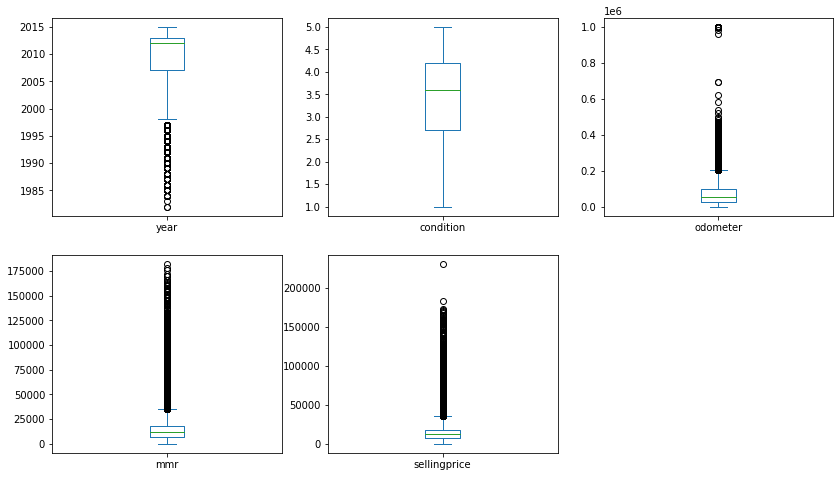

In [15]:
#Mit einem Boxplot werden die Ausreißer überprüft.
df[continous_columns].plot(kind='box',subplots=True,layout=(2,3),figsize=(14,8))
plt.show()

In [16]:
# Funktion zur Rückgabe des Index für die Spalte, deren Datenpunkte größer als die angegebene Grenze sind
def outs(col,limit):
    index = []
    index = df[df[col]>limit].index

    return index

In [17]:
# Dieser Index hat Datenpunkte, die sehr weit von der Gruppe der Datenpunkte entfernt sind.
# Ersetzt werden diese Punkte durch Werte in der Nähe des Clusters
ind = outs('odometer',900000)
ind

Int64Index([   275,   4626,  13317,  13480,  13568,  20838,  38465,  39178,
             40121,  55492,  57588,  58330,  59320,  61824,  70798,  76882,
             81661,  83882,  84086,  96234, 103031, 117926, 117972, 118104,
            135334, 136242, 163868, 166054, 168800, 179448, 191690, 194973,
            240950, 245595, 260722, 260729, 275351, 279980, 290236, 321671,
            321728, 321779, 323274, 338793, 347888, 354485, 361178, 367686,
            373462, 385365, 385721, 398167, 404788, 406428, 409935, 416793,
            417515, 418605, 451991, 452007, 452254, 452267, 456527, 462004,
            462289, 476582, 477244, 485257, 485594, 489822, 490450, 501462,
            513201, 541011],
           dtype='int64')

In [18]:
value = round(np.percentile(df.odometer,99),1)
value

226662.4

In [19]:
df.loc[ind,'mmr'] = value

In [20]:
# Dieser Index hat Datenpunkte, die sehr weit von der Gruppe der Datenpunkte entfernt sind.
# Es wurden Punkte ersetzt durch Werte die in der Nähe des Clusters sind.
ind = outs('sellingprice',100000)
ind

Int64Index([  1102,   5646,   5676,   5842,   5960,   6459,   6501,   6732,
              6748,  12948,
            ...
            553158, 553594, 555815, 556494, 556797, 557544, 557821, 557822,
            557931, 558790],
           dtype='int64', length=166)

In [21]:
value = round(np.percentile(df.sellingprice,99),1)
value

44900.0

In [22]:
df.loc[ind,'sellingprice'] = value

In [23]:
# Die Außreiser sind damit abgeschlossen
# Label-Kodierung


In [24]:
categorical_columns

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in categorical_columns:
  df[x] = le.fit_transform(df[x])

In [26]:
#Feature Selection
X = df.copy()

In [27]:
X.drop('sellingprice',inplace=True,axis=1)

In [28]:
Y = df.sellingprice

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X,Y)

ExtraTreesRegressor()

In [30]:
zip(et.feature_importances_,X.columns)

In [31]:
imp_col = pd.DataFrame(zip(et.feature_importances_,X.columns),columns=['Importance','Columns'])

In [32]:
imp_col.sort_values(by='Importance',ascending=False).head()

,Importance,Columns
13,0.654003,mmr
0,0.126740,year
8,0.107018,condition
9,0.071190,odometer
6,0.012833,vin


In [33]:
#Auswahl der ersten 5 Spalten
X = X[['mmr','year','condition','odometer','vin']]

In [34]:
X

,mmr,year,condition,odometer,vin
0,20500.0,2015,5.0,16639.0,403800
1,20800.0,2015,5.0,9393.0,403792
2,31900.0,2014,4.5,1331.0,507007
3,27500.0,2015,4.1,14282.0,546650
4,66000.0,2014,4.3,2641.0,508040
...,...,...,...,...,...
558806,35300.0,2015,4.5,18255.0,488919
558807,30200.0,2012,5.0,54393.0,289636
558808,29800.0,2012,4.8,50561.0,398254
558809,15100.0,2015,3.8,16658.0,192494


In [35]:
#Modelbau und Splittung un Trainings-und Testdaten
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
random_state=10)

In [36]:
#Lineare Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)

In [37]:
# Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

lracc = r2_score(Y_test,Y_pred)
print('Score ->',lracc)

lrmae = mean_absolute_error(Y_test,Y_pred)
print('MAE ->',lrmae)

lrmse = mean_squared_error(Y_test,Y_pred)
print('MSE ->',lrmse)

lrrmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('RMSE ->',lrrmse)

adjusted_r_squared = 1 - (1-lracc)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print('Adjusted R2 ->',adjusted_r_squared)

Score -> 0.9157776532090882
MAE -> 1454.4627408015326
MSE -> 7758185.352467652
RMSE -> 2785.351926142844
Adjusted R2 -> 0.9157768996157346


<AxesSubplot:xlabel='sellingprice'>

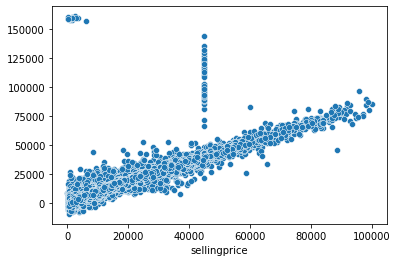

In [38]:
#Streudiagramm der tatsächlichen Werte gegenüber den vorhergesagten Werten
sns.scatterplot(x=Y_test,y=Y_pred)

<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

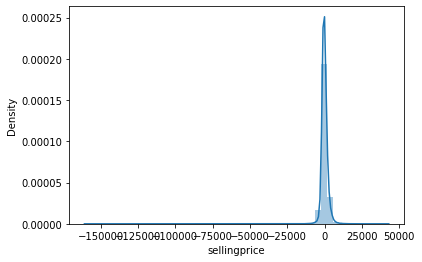

In [39]:
sns.distplot(Y_test-Y_pred)